In [1]:
########################
#Classic classification
#Black Box run through
########################

from sklearn import datasets

#This data is stored in the .data member, which is a n_samples, n_features array
iris = datasets.load_iris()
digits = datasets.load_digits()

print("looking at dataset features")
print(digits.data)
print("\neach digit image we are trying to learn")
digits.target

#use help() to get information on packages or objects

print("\nEach sample is a digit (8,8)")
digits.images[0]

print("In the case of the digits dataset, the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.\n")

print("An example of an estimator is the class sklearn.svm.SVC that implements support vector classification. The constructor of an estimator takes as arguments the parameters of the model, but for the time being, we will consider the estimator as a black box:\n")

from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.) #estimator instance

#training
clf.fit(digits.data[:-1], digits.target[:-1]) 

#predicting class labels from the data
clf.predict(digits.data[-1:])
print("Now we've implemented some prediction from data as a black box run through. Now let's go through some details.\n")

looking at dataset features
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]

each digit image we are trying to learn

Each sample is a digit (8,8)
In the case of the digits dataset, the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.

An example of an estimator is the class sklearn.svm.SVC that implements support vector classification. The constructor of an estimator takes as arguments the parameters of the model, but for the time being, we will consider the estimator as a black box:

Now we've implemented some prediction from data as a black box run through. Now let's go through some details.



In [36]:
########################
#Statistical learning: 
#the setting and the estimator 
#object in scikit-learn
########################

#importing modules
from sklearn import datasets
import matplotlib.pyplot as plt

#2D arrays aka matrices with rows as samples and columns as features
iris = datasets.load_iris()
data = iris.data
data.shape #150 observations and 4 features

#Note: When the data is not initially in the (n_samples, n_features) shape, 
#it needs to be preprocessed in order to be used by scikit-learn.

#For example:
digits = datasets.load_digits()
digits.images.shape
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)
#reformatting to have n_samples by n_features format to use in scikit learn
data = digits.images.reshape((digits.images.shape[0], -1))
print(data)

#####
#Estimator objects
#####

#Fitting Data
#an estimator is any object that learns from data; it may be a classification, 
#regression or clustering algorithm or a transformer that extracts/filters 
#useful features from raw data.
#fit(data) --> all estimators contain a 'fit' method that takes a 2D array

#can set parameters for estimators
#estimator = Estimator(param1=1, param2=2)

#When data is fitted with an estimator, parameters are estimated from the data at hand. 
#All the estimated parameters are attributes of the estimator object ending by an underscore
#estimator.estimated_param_

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]



actual
[1 2 1 0 0 0 2 1 2 0]

predicted
[1 1 1 0 0 0 2 1 2 0]

regression coefficient
[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]
The mean square error
2004.56760269

explained variance score
0.585075302269
[0.58511106838835314, 0.58520730154446743, 0.58546775406984908, 0.58555120365039159, 0.58307170855541623, 0.570589994372801]

lasso coef
[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982    -0.
 -187.19554705   69.38229038  508.66011217   71.84239008]


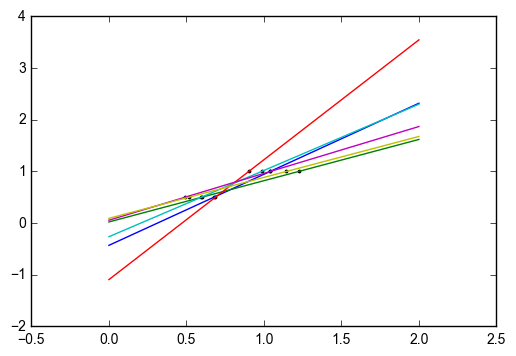

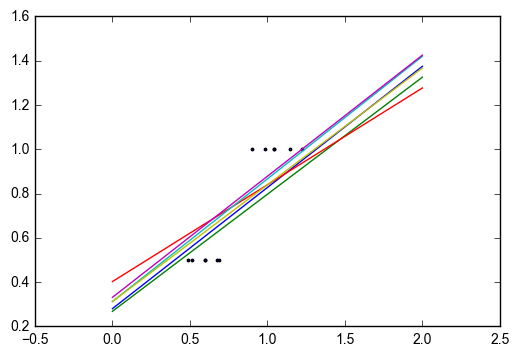

In [75]:
########################
#Supervised learning: 
#predicting an output variable 
#from high-dimensional observations
########################

import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

#K-Nearest neighbors classifier#

# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 


print("\nactual")
print(knn.predict(iris_X_test))

print("\npredicted")
print(iris_y_test)

#Linear model: from regression to sparsity#

#The diabetes dataset consists of 10 physiological variables 
#(age, sex, weight, blood pressure) measure on 442 patients, 
#and an indication of disease progression after one year:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

#Linear regression#

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

print("\nregression coefficient")
print(regr.coef_)



print("The mean square error")
print(np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2))


# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
print("\nexplained variance score")
print(regr.score(diabetes_X_test, diabetes_y_test))

#Shrinkage#

X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()

%matplotlib inline
import matplotlib.pyplot as plt 

plt.figure() 

np.random.seed(0)
for _ in range(6): 
   this_X = .1*np.random.normal(size=(2, 1)) + X
   regr.fit(this_X, y)
   plt.plot(test, regr.predict(test)) 
   plt.scatter(this_X, y, s=3)
    
#ride regression shrinks the coefficients under the
#hypothesis that shrinking them to 0: any two randomly 
#chosen set of observations are likely to be uncorrelated.

#This is an example of bias/variance tradeoff: the larger 
#the ridge alpha parameter, the higher the bias and the 
#lower the variance.
regr = linear_model.Ridge(alpha=.1)

plt.figure() 

np.random.seed(0)
for _ in range(6): 
   this_X = .1*np.random.normal(size=(2, 1)) + X
   regr.fit(this_X, y)
   plt.plot(test, regr.predict(test)) 
   plt.scatter(this_X, y, s=3) 
    
    
alphas = np.logspace(-4, -1, 6)
from __future__ import print_function
print([regr.set_params(alpha=alpha
            ).fit(diabetes_X_train, diabetes_y_train,
            ).score(diabetes_X_test, diabetes_y_test) for alpha in alphas]) 

#Sparsity#

#removing non-informative features

regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha
            ).fit(diabetes_X_train, diabetes_y_train
            ).score(diabetes_X_test, diabetes_y_test)
       for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)


print("\nlasso coef")
print(regr.coef_)

#Classification#

#Predicting discrete labels
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)

#Support Vector Machines#

#discriminate method to classify labels
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)  

#Using kernels#

#Like SVM but uses a kernel trick and makes discriminate plane polynomial
svc = svm.SVC(kernel='poly',
              degree=3)
# degree: polynomial degree
#Making decision "energies"
svc = svm.SVC(kernel='rbf')
# gamma: inverse of size of
# radial kernel



In [113]:
########################
#Model Selection: 
#choosing estimators and
#their parameters
########################

#Score, and cross-validated score#

from sklearn import datasets, svm
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')
#every estimator exposes a score method that can judge the quality of the fit on new data
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

#to get a better measure on prediction accuracy, we split
#the data into folds
#called K-fold cross-validation
import numpy as np
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()
for k in range(3):
    #We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
print(scores,"\n")

#Cross-validation generators#

#Split method: accepts input dataset to be
#split and yields the train/test set indices 
#for each iteration of the chosen cross-validation strategy

from sklearn.model_selection import KFold, cross_val_score
X =["a", "a", "b", "c", "c", "c"]
k_fold = KFold(n_splits = 3)
for train_indices, test_indices in k_fold.split(X):
    print("Train: %s | test: %s" % (train_indices, test_indices))
    
#performing cross-validation
kfold = KFold(n_splits = 3)
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
    for train, test in k_fold.split(X_digits)] #same as above scores

#or using the cross validation helper function
cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1)
#can indicate scoring argument to specify alternative scoring method
cross_val_score(svc, X_digits, y_digits, cv=k_fold, scoring='precision_macro')

#Grid-search and cross-validated estimators#
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),
                  n_jobs=-1)
clf.fit(X_digits[:1000], y_digits[:1000])
clf.best_score_
clf.best_estimator_.C
#Prediction performance on test set is not as good as on train set
clf.score(X_digits[1000:], y_digits[1000:])

#Nested cross-validation#
cross_val_score(clf, X_digits, y_digits)

#Cross-validated estimators#
#setting parameter automatically by cross-validation
from sklearn import linear_model, datasets
lasso = linear_model.LassoCV()
diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target
lasso.fit(X_diabetes, y_diabetes)
#The estimator chose automatically its lambda:
lasso.alpha_

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184] 

Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]


0.012291895087486173

In [123]:
########################
#Unsupervised learning: 
#seeking representations
#of the data
########################

#Clustering: grouping observations together#

#K-means clustering#
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
k_means = cluster.KMeans(n_clusters = 3)
k_means.fit(X_iris)
print(k_means.labels_[::10])

#application example: vector quantization#
import scipy as sp
try:
    face = sp.face(gray=True)
except AttributeError:
    from scipy import misc
    face = misc.face(gray=True)
X = face.reshape((-1,1)) #We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=5, n_init=1)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

#Hierarchical agglomerative clustering: Ward

#Connectivity-constrained clustering#
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils.testing import SkipTest
from sklearn.utils.fixes import sp_version

if sp_version < (0, 12):
    raise SkipTest("Skipping because SciPy version earlier than 0.12.0 and "
                   "thus does not include the scipy.misc.face() image.")


###############################################################################
# Generate data
try:
    face = sp.face(gray=True)
except AttributeError:
    # Newer versions of scipy have face in misc
    from scipy import misc
    face = misc.face(gray=True)

# Resize it to 10% of the original size to speed up the processing
face = sp.misc.imresize(face, 0.10) / 255.

#feature agglomeration#
digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)
agglo = cluster.FeatureAgglomeration(connectivity=connectivity,n_clusters=32)
agglo.fit(X)
X_reduced = agglo.transform(X)
X_approx = agglo.inverse_transform(X_reduced)
images_approx = np.reshape(X_approx, images.shape)

#Decompositions: from a signal to components and loadings#

#PCA: selects successive components that explain the maximum variance in the signal#
#When used to transform data, PCA can reduce 
#the dimensionality of the data by projecting on a principal subspace.
# Create a signal with only 2 useful dimensions
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)
x3 = x1 + x2
X = np.c_[x1, x2, x3]
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)
print("\nPCA explained variance:")
print(pca.explained_variance_)
#As we can see, only the 2 firts components are useful
pca.n_components = 2
X_reduced = pca.fit_transform(X)
X_reduced.shape

#ICA#
#selects components so that the distribution 
#of their loadings carries a maximum amount of 
#independent information. It is able to recover 
#non-Gaussian independent signals:
# Generate sample data
time = np.linspace(0, 10, 2000)
s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
S = np.c_[s1, s2]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise
S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1], [0.5, 2]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = decomposition.FastICA()
S_ = ica.fit_transform(X)  # Get the estimated sources
A_ = ica.mixing_.T
np.allclose(X,  np.dot(S_, A_) + ica.mean_)


[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]

PCA explained variance:
[  3.15603798e+00   1.04482092e+00   1.16357892e-31]


array([  0.00000000e+00,   5.00250125e-03,   1.00050025e-02, ...,
         9.98999500e+00,   9.99499750e+00,   1.00000000e+01])

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title', 'logistic', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
2017-04-02 16:39:55,456 Loading LFW people faces from /Users/nickgiangreco/scikit_learn_data/lfw_home



Faces recognition example using eigenfaces and SVMs

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

.. _LFW: http://vis-www.cs.umass.edu/lfw/

Expected results for the top 5 most represented people in the dataset:

================== ============ ======= ========== =======
                   precision    recall  f1-score   support
================== ============ ======= ========== =======
     Ariel Sharon       0.67      0.92      0.77        13
     Colin Powell       0.75      0.78      0.76        60
  Donald Rumsfeld       0.78      0.67      0.72        27
    George W Bush       0.86      0.86      0.86       146
Gerhard Schroeder       0.76      0.76      0.76        25
      Hugo Chavez       0.67      0.67      0.67        15
       Tony Blair       0.81      0.69      0.75        36

      avg / total       0.80      0.80      0.80       322
===============

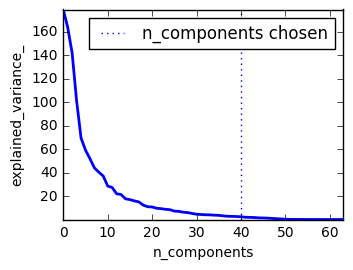

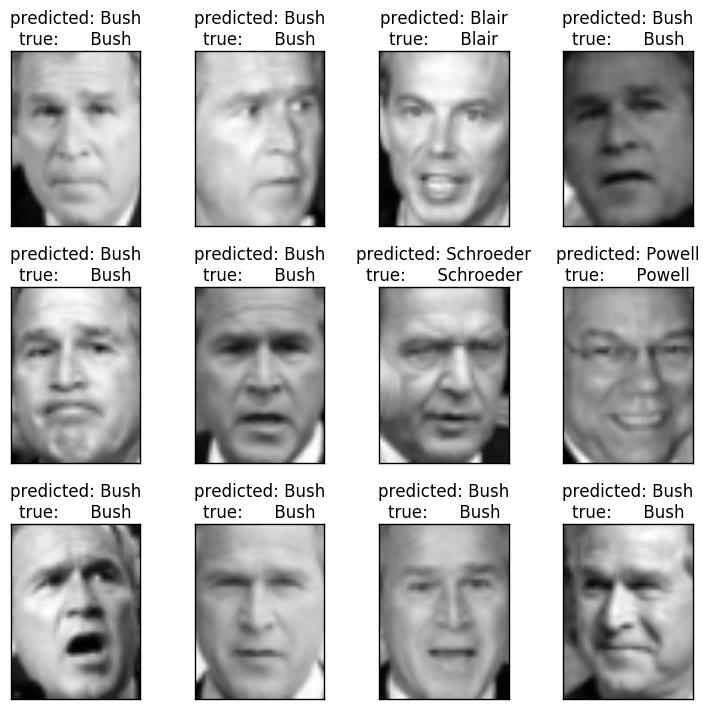

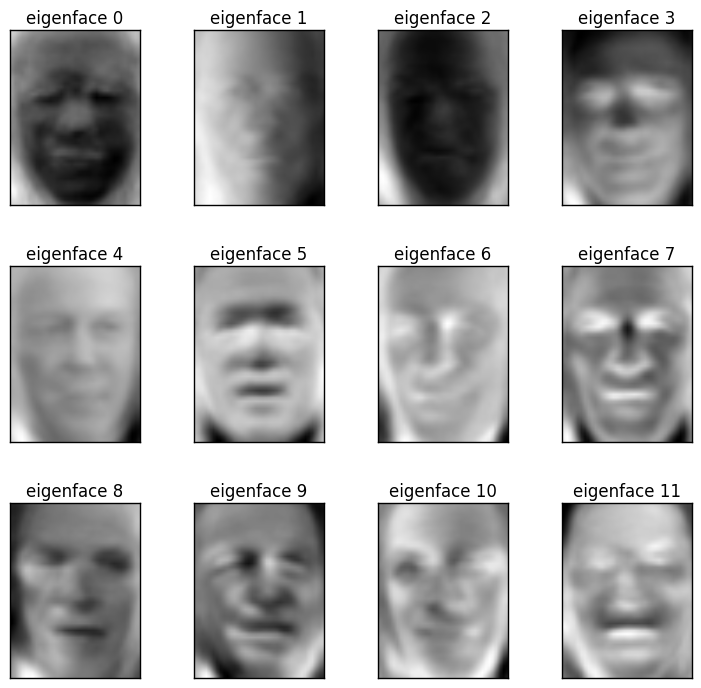

In [4]:
########################
#Putting it all together
########################

#Pipelining#
#As opposed to estimators transforming and predicting variables,
#estimators can also combine variables

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

#linear model for classification
logistic = linear_model.LogisticRegression()

#reduced via SVD
pca = decomposition.PCA()
#sequentially apply a list of transforms
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

###############################################################################
# Plot the PCA spectrum
%pylab inline

pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

###############################################################################
# Prediction

n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

#exhaustive search over parameter values for an estimator
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))

#Face recognition with eigenfaces#

"""
===================================================
Faces recognition example using eigenfaces and SVMs
===================================================

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

.. _LFW: http://vis-www.cs.umass.edu/lfw/

Expected results for the top 5 most represented people in the dataset:

================== ============ ======= ========== =======
                   precision    recall  f1-score   support
================== ============ ======= ========== =======
     Ariel Sharon       0.67      0.92      0.77        13
     Colin Powell       0.75      0.78      0.76        60
  Donald Rumsfeld       0.78      0.67      0.72        27
    George W Bush       0.86      0.86      0.86       146
Gerhard Schroeder       0.76      0.76      0.76        25
      Hugo Chavez       0.67      0.67      0.67        15
       Tony Blair       0.81      0.69      0.75        36

      avg / total       0.80      0.80      0.80       322
================== ============ ======= ========== =======

"""
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

#print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


###############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

###############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

###############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
#SVC: C-Support vector classification with a 
#radial basis function kernal that always takes 
#parameters C and gamma
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

###############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

###############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()